## Project 3 -  Sweet Spot Swindle

By Jasmine Kamdar and Colin Takeda


In the game of billiards, the player seeks to have the greatest control over the cue ball and the target ball. In order to achieve the greatest amount of control one is often advised to hit the ball in the coveted 'sweet spot.' The 'sweet spot' has come to mean the height at which one applied a force where the cue ball immediately starts rolling without slipping. However, does the 'sweet spot' actually affect one's ability to play the game? 

**Question:** Does hitting the sweet spot in pool have a significant effect on the end result of a pool shot, if initial velocity is held constant? For this model, a significant effect will be quantified by the time taken to get to rolling without slipping and the difference in end velocity. 

**Methodology:** For heights other than the sweet spot, we will calculate the amount of time it takes for the ball to start rolling without slipping and the corresponding velocities and distances. 
For the sweet spot, the ball will immediately start rolling without slipping.
For both parts, we will then model the end velocity of these balls at a given constant distance.

**Assumptions:**

-Force is applied parallel to the ground

-Sweet spot is defined as immediate rolling without slipping

-The force is applied to a singular point



**Results:**
Time it takes different heights to get to a controlled state (rolling without slipping)
End velocities of the different hits


**Interpretation:**
The percent difference between applying a force at different heights, the sweet spot, and the control
Contacted the United STate Professional Pool Players Association to see if the sweet spot is a concept professional keep in mind


In [279]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr'

# import functions from the modsim.py module
from modsim import *

In [280]:
m = UNITS.meter
s = UNITS.second
degree = UNITS.degree
radian = UNITS.radian
newton = UNITS.newton
kg = UNITS.kilogram

In [281]:
params = Params(
               w_0 = 0 * radian/s,
               v_0 = 10 * m/s,
               cof_f= 0.2,     #Coefficient of friction between the ball and table
               cof_res=0.005,   #Coefficient of rolling resistance between the ball and table       
               r_ball = 5.715/200 * m, 
               m_cue = 0.17 * kg,
               m_ball = 0.16 * kg,
               g = 9.8 *m / s**2,
               L = 2.54 * m,
               t_end = 10 * s,

              )
print(params)

w_0            0.0 radian / second
v_0            10.0 meter / second
cof_f                          0.2
cof_res                      0.005
r_ball              0.028575 meter
m_cue                0.17 kilogram
m_ball               0.16 kilogram
g          9.8 meter / second ** 2
L                       2.54 meter
t_end                    10 second
dtype: object


In [282]:
def make_system(params):
    
    unpack(params)
  
    I = (2/5)*m_cue * r_ball**2
    F_f = cof_f*(m_ball*g)
    F_res = (cof_res*m_ball*g)
    t_roll = (2*v_0) / (7*cof_f*g) #Time at which rolling without slipping starts
        
    
    P = Vector(0, 0) * m
    V = Vector(v_0 , 0) * m/s
    
    init = State(x=P.x, theta=0, 
                 vx=V.x, omega=0)
 
    
    return System(init=init, t_end=t_end,F_f=F_f,I=I,t_roll=t_roll,F_res=F_res)
  

In [283]:
system = make_system(params)

In [284]:
def slope_func(state, t, system): #Ball Hit at Center of Mass, No Overspin or Underspin
    
    x, theta, v, omega = state
    unpack(system)
    t=t*s
    
    tau  = F_f*r_ball 
    
    if t <= t_roll: #Slipping occurs

        v=v_0-(cof_f*g*t)
        omega = ((5*cof_f*g)/(2*r_ball))*t *radian
        alpha = (5*cof_f*g)/(2*r_ball)     *radian
        a = -cof_f*g
        
    else: #Rolling with Slipping 
        
        a = -F_res/m_ball
        v = v_0 + a*t
    
        omega = v/r_ball *radian
        alpha = a/r_ball *radian #something weird

    return v, omega, a, alpha

In [285]:
slope_func(system.init, 0, system)

(<Quantity(10.0, 'meter / second')>,
 <Quantity(0.0, 'radian / second')>,
 <Quantity(-1.9600000000000002, 'meter / second ** 2')>,
 <Quantity(171.4785651793526, 'radian / second ** 2')>)

In [286]:
def event_func(state,t,system):
    
    unpack(system)
    x, theta, v, omega = state

    stop = r_ball*omega
   # return L - x #Stops simualtion at 3 meters
    return v

In [287]:
event_func(init,0,system)

<Quantity(10.0, 'meter ** 2 / second ** 2')>

In [288]:
results, details = run_ode_solver(system,slope_func,events=event_func, max_step=0.05)
details
print(results)

                   x         theta         vx       omega
0.000000    0.000000  0.000000e+00  10.000000    0.000000
0.000006    0.000058  2.905353e-09   9.999989    0.000998
0.000064    0.000640  3.515477e-07   9.999874    0.010980
0.000646    0.006461  3.579685e-05   9.998734    0.110801
0.006467    0.064632  3.586138e-03   9.987324    1.109005
0.056467    0.561548  2.733846e-01   9.889324    9.682933
0.106467    1.053565  9.718794e-01   9.791324   18.256861
0.156467    1.540681  2.099071e+00   9.693324   26.830790
0.206467    2.022897  3.654958e+00   9.595324   35.404718
0.256467    2.500213  5.639542e+00   9.497324   43.978646
0.306467    2.972629  8.052823e+00   9.399324   52.552574
0.356467    3.440146  1.089480e+01   9.301324   61.126503
0.406467    3.902762  1.416547e+01   9.203324   69.700431
0.456467    4.360478  1.786484e+01   9.105324   78.274359
0.506467    4.813294  2.199291e+01   9.007324   86.848287
0.556467    5.261210  2.654967e+01   8.909324   95.422216
0.606467    5.

## Control - No Initial Torque

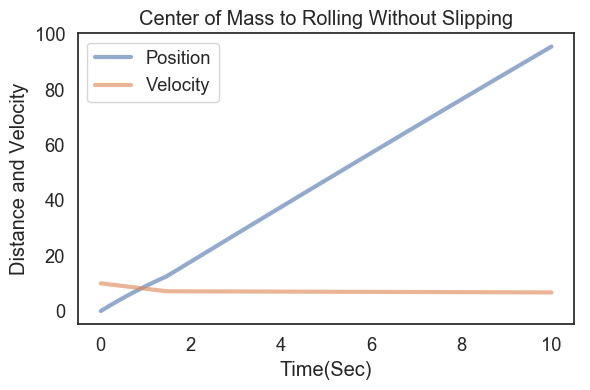

In [291]:
plt.figure(dpi = 100)
plot(results.x,label='Position')
plot(results.vx,label='Velocity')
#plot(results.omega,label='Omega')
#plot(results.theta,label='Theta')

decorate(title='Center of Mass to Rolling Without Slipping',
         xlabel='Time(Sec)',
         ylabel='Distance and Velocity')

## Sweet Spot

In [278]:
def update_func(state, t, system): #Ball Hit at Heights Above Center of Mass
    
    x, theta, v, omega = state
    unpack(system)
    t=t*s

    #Linear Equations
    v=v_0-(cof_f*g*t)
  
    #a=-cof_f*g
  #  dvdt = -v
    a = -cof_f*g
    
   # a = -r_ball*alpha
    

    omega=v/r_ball*radian
    
        
    #Rotational Equations 
    h = (2/5)*dvdt
    f_app = 
    tau  = F_f*r_ball + f_app*h#Should torque be torque applied by friction and initial height
    alpha  = tau / I *radian
    
    
    return v, omega, a, alpha

SyntaxError: invalid syntax (<ipython-input-278-f46883b2f87d>, line 22)